In [21]:
import pandas as pd
import numpy as np

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/X_train.csv', index_col=0)
X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/X_test.csv', index_col=0)
y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/y_train.csv', index_col=0)
y_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/y_test.csv', index_col=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15980, 69), (3995, 69), (15980, 1), (3995, 1))

In [24]:
# Concatenate X_train and X_test along rows
X_combined = pd.concat([X_train, X_test], axis=0)
X_combined.head()

,Clear,Relatable,Memorable,Engaging,Symbolic,Lyrical,Happy,Surprised,Fearful,Angry,...,key_9,key_10,key_11,log_speechiness,log_acousticness,log_instrumentalness,log_liveness,lang_English,lang_Portuguese,lang_Spanish
track_id,,,,,,,,,,,,,,,,,,,,,
0WEgOlUCB9nHPsoD8Ae4Zz,0.888889,0.625,0.777778,0.875,0.666667,0.777778,0.444444,0.625,0.250,0.222222,...,0,0,0,-0.839006,0.446741,0.379701,-0.931726,1,0,0
1KjQPDJQCUuqDj3AmfSBCa,0.444444,0.125,0.555556,0.500,0.222222,0.444444,0.111111,0.000,0.875,0.000000,...,0,0,0,-0.156182,0.379473,-1.168098,1.200479,1,0,0
0taOCiup4HNG9LmbduVlJj,0.444444,0.250,0.555556,0.375,0.222222,0.555556,0.111111,0.125,0.875,0.777778,...,0,0,0,1.668167,-1.978102,-1.168098,1.270674,1,0,0
7a9QBLlQOunA6KvPcVDIMt,0.666667,0.500,0.777778,0.625,0.444444,0.666667,0.333333,0.625,0.125,0.111111,...,0,0,0,-0.227543,0.045213,-1.168098,1.304566,1,0,0
69QIVIjPMnI1ABLBqh9P1b,0.777778,0.625,0.777778,0.750,0.444444,0.777778,0.555556,0.375,0.500,0.333333,...,0,0,1,-0.658345,0.921994,-1.168098,0.771210,1,0,0


In [26]:
# Concatenate X_train and X_test along rows
y_combined = pd.concat([y_train, y_test], axis=0)
y_combined.head()

,track_popularity
track_id,
0WEgOlUCB9nHPsoD8Ae4Zz,48
1KjQPDJQCUuqDj3AmfSBCa,74
0taOCiup4HNG9LmbduVlJj,3
7a9QBLlQOunA6KvPcVDIMt,51
69QIVIjPMnI1ABLBqh9P1b,63


In [27]:
import pickle

# Load the model
loaded_model6 = pickle.load(open('/content/drive/My Drive/Colab Notebooks/datasets/neural_network_model6.pkl', 'rb'))

In [28]:
loaded_model6.summary() # check the structure of the model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 69)                4830      
                                                                 
 batch_normalization_8 (Bat  (None, 69)                276       
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 36)                2520      
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_16 (Dense)            (None, 18)                666       
                                                                 
 batch_normalization_9 (Bat  (None, 18)                72        
 chNormalization)                                     

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
# create an array with actual track popularity scores
y_actual = y_combined['track_popularity']

# make predictions
predictions = loaded_model6.predict(X_combined)

# get mean absolute error
mae = mean_absolute_error(y_actual, predictions)
print("Mean Absolute Error:", mae)

625/625 [==============================] - 1s 1ms/step
Mean Absolute Error: 16.869222969418026


In [31]:
predictions.shape

(19975, 1)

In [32]:
# convert predictions array to a DataFrame with the same index as X_combined
predictions_df = pd.DataFrame(predictions, index=X_combined.index, columns=['Prediction'])

# concatenate the three dataframes
combined_data = pd.concat([X_combined, y_combined, predictions_df], axis=1)

# check the shape
combined_data.shape

(19975, 71)

In [33]:
combined_data.head()

,Clear,Relatable,Memorable,Engaging,Symbolic,Lyrical,Happy,Surprised,Fearful,Angry,...,key_11,log_speechiness,log_acousticness,log_instrumentalness,log_liveness,lang_English,lang_Portuguese,lang_Spanish,track_popularity,Prediction
track_id,,,,,,,,,,,,,,,,,,,,,
0WEgOlUCB9nHPsoD8Ae4Zz,0.888889,0.625,0.777778,0.875,0.666667,0.777778,0.444444,0.625,0.250,0.222222,...,0,-0.839006,0.446741,0.379701,-0.931726,1,0,0,48,52.025478
1KjQPDJQCUuqDj3AmfSBCa,0.444444,0.125,0.555556,0.500,0.222222,0.444444,0.111111,0.000,0.875,0.000000,...,0,-0.156182,0.379473,-1.168098,1.200479,1,0,0,74,37.043102
0taOCiup4HNG9LmbduVlJj,0.444444,0.250,0.555556,0.375,0.222222,0.555556,0.111111,0.125,0.875,0.777778,...,0,1.668167,-1.978102,-1.168098,1.270674,1,0,0,3,48.264126
7a9QBLlQOunA6KvPcVDIMt,0.666667,0.500,0.777778,0.625,0.444444,0.666667,0.333333,0.625,0.125,0.111111,...,0,-0.227543,0.045213,-1.168098,1.304566,1,0,0,51,43.239338
69QIVIjPMnI1ABLBqh9P1b,0.777778,0.625,0.777778,0.750,0.444444,0.777778,0.555556,0.375,0.500,0.333333,...,1,-0.658345,0.921994,-1.168098,0.771210,1,0,0,63,52.837860


In [34]:
combined_data.shape

(19975, 71)

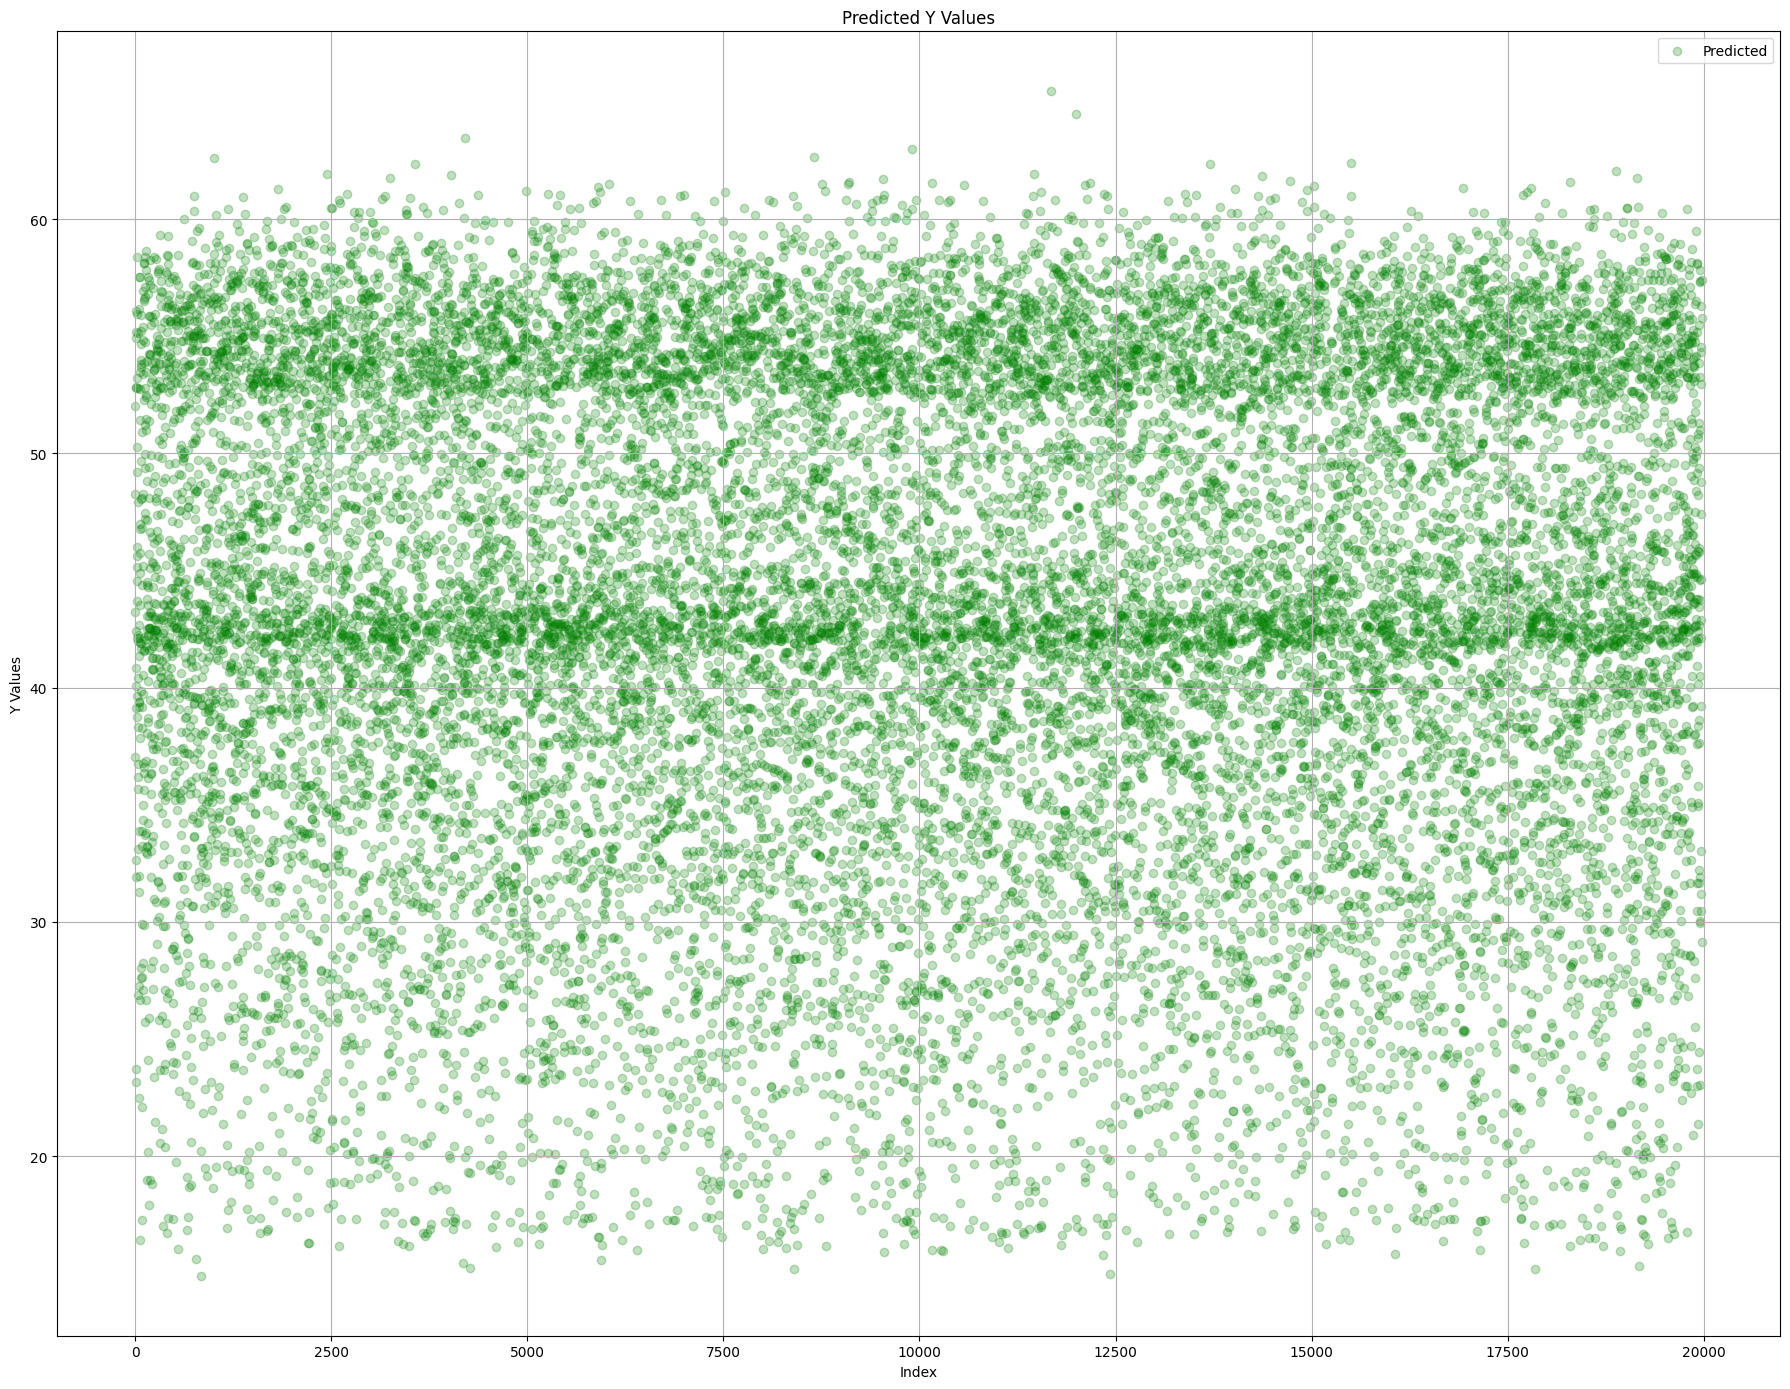

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14))

plt.scatter(range(len(X_combined)), predictions, color='green', label='Predicted', alpha=0.25)
plt.title('Predicted Y Values')
plt.xlabel('Index')
plt.ylabel('Y Values')
plt.yticks()  # make the same as the other subplot
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

In [36]:
combined_data.to_csv('/content/drive/My Drive/Colab Notebooks/datasets/combined_data.csv', index=True)